#Installationsanleitung
#Bei der Verwendung von Anaconda kann NumPy wie folgt installiert werden. Im Anaconda Navigator -> Environments -> base(root) Klick auf den Pfeil -> Open Terminal. Dann folgendes eingeben:

#pip install numpy
#pip install plotly==5.4.0
#pip install jupyter-dash

#Anstelle pip können Sie auch conda nutzen conda install numpy

#Bitte installieren auch schon folgende Bibliotheken, die wir später benötigen werden

#conda install pandas  
#conda install matplotlib

In [1]:
# General Packages

import pandas as pd
import numpy as np

# Visualization packages

import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib import cm
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

import dash
from dash import dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Preprocessing
from sklearn import preprocessing


<ipython-input-1-0a398f6be1e4>:17: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
# import raw dataset
df_start = pd.read_csv("./data/raw.csv")

# delete redundant/non unuique values
df_start.pop("EmployeeCount")
df_start.pop("StandardHours")
df_start.pop("EmployeeNumber")


#show values
df_start.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 32 columns]

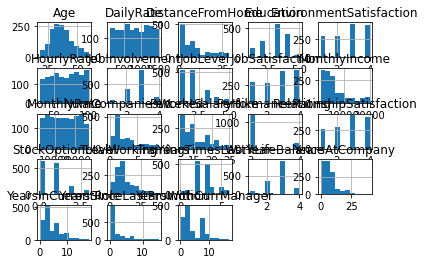

<Figure size 1080x576 with 0 Axes>

In [3]:
df_start.hist()
plt.figure(figsize=(15,8))
plt.show()

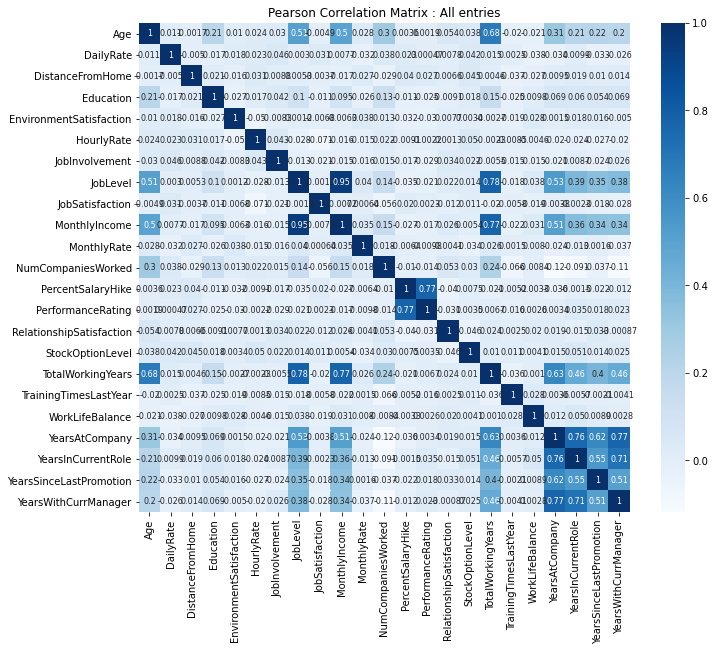

In [4]:
# Plot Pearson correlation matrix for all entries
fig_1 = plt.figure(figsize=(11, 9)) 
correlations = df_start.corr() 

sns.heatmap(correlations, annot=True, cmap='Blues', annot_kws={'size': 8}) 
plt.title('Pearson Correlation Matrix : All entries') 
plt.show()

In [5]:
Attrition = df_start.groupby('Attrition')
Attrition.mean()

Age   DailyRate  DistanceFromHome  Education  \
Attrition                                                       
No         37.561233  812.504461          8.915653   2.927007   
Yes        33.607595  750.362869         10.632911   2.839662   

           EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Attrition                                                                  
No                        2.771290   65.952149        2.770479  2.145985   
Yes                       2.464135   65.573840        2.518987  1.637131   

           JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
Attrition                                  ...                      
No                2.778589    6832.739659  ...           3.153285   
Yes               2.468354    4787.092827  ...           3.156118   

           RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
Attrition                                                                  
No                         2.733982          0.845093          11.862936   
Yes                        2.599156          0.527426           8.244726   

           TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Attrition                                                           
No                      2.832928         2.781022        7.369019   
Yes                     2.624473         2.658228        5.130802   

           YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
Attrition                                                                     
No                   4.484185                 2.234388              4.367397  
Yes                  2.902954                 1.945148              2.852321  

[2 rows x 23 columns]

In [6]:
Attrition.describe()

Age                                                   DailyRate  \
            count       mean      std   min   25%   50%   75%   max     count   
Attrition                                                                       
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0    1233.0   
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0     237.0   

                       ... YearsSinceLastPromotion       YearsWithCurrManager  \
                 mean  ...                     75%   max                count   
Attrition              ...                                                      
No         812.504461  ...                     3.0  15.0               1233.0   
Yes        750.362869  ...                     2.0  15.0                237.0   

                                                         
               mean       std  min  25%  50%  75%   max  
Attrition                                                
No         4.367397  3.594116  0.0  2.0  3.0  7.0  17.0  
Yes        2.852321  3.143349  0.0  0.0  2.0  5.0  14.0  

[2 rows x 184 columns]

In [7]:
Attrition["MonthlyIncome"].describe()

count         mean          std     min     25%     50%     75%  \
Attrition                                                                     
No         1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0  8834.0   
Yes         237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0  5916.0   

               max  
Attrition           
No         19999.0  
Yes        19859.0

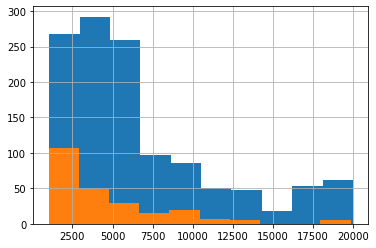

<Figure size 1080x576 with 0 Axes>

In [8]:
Attrition["MonthlyIncome"].hist()
plt.figure(figsize=(15,8))
plt.show()

In [9]:
df_Attrition_Yes = df_start[df_start['Attrition']=="Yes"]
df_Attrition_Yes.head()

Age Attrition BusinessTravel  DailyRate              Department  \
0    41       Yes  Travel_Rarely       1102                   Sales   
2    37       Yes  Travel_Rarely       1373  Research & Development   
14   28       Yes  Travel_Rarely        103  Research & Development   
21   36       Yes  Travel_Rarely       1218                   Sales   
24   34       Yes  Travel_Rarely        699  Research & Development   

    DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                  1          2  Life Sciences                        2   
2                  2          2          Other                        4   
14                24          3  Life Sciences                        3   
21                 9          4  Life Sciences                        3   
24                 6          1        Medical                        2   

    Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0   Female  ...                  3                         1   
2     Male  ...                  3                         2   
14    Male  ...                  3                         2   
21    Male  ...                  4                         2   
24    Male  ...                  3                         3   

    StockOptionLevel TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                  0                 8                      0               1   
2                  0                 7                      3               3   
14                 0                 6                      4               3   
21                 0                10                      4               3   
24                 0                 8                      2               3   

    YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                6                   4                        0   
2                0                   0                        0   
14               4                   2                        0   
21               5                   3                        0   
24               4                   2                        1   

   YearsWithCurrManager  
0                     5  
2                     0  
14                    3  
21                    3  
24                    3  

[5 rows x 32 columns]

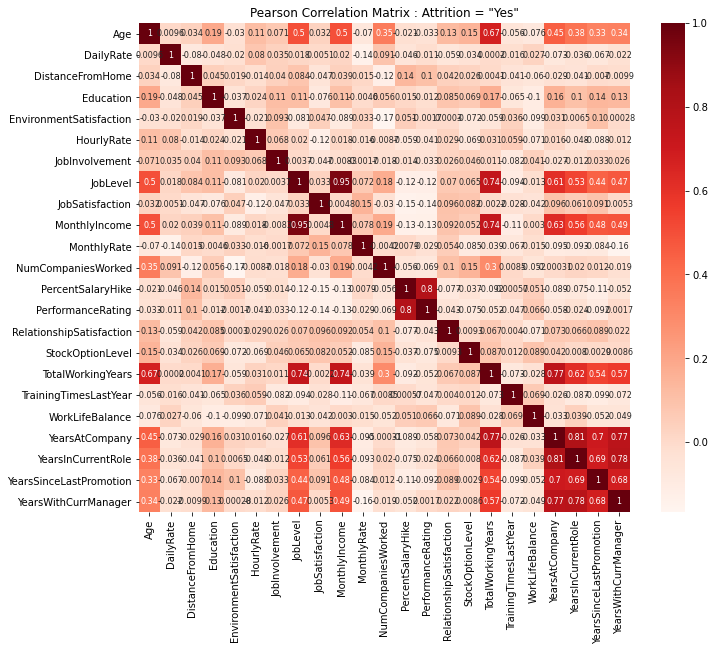

In [10]:
# Plot Pearson correlation matrix for Attrition = "Yes"
fig_1 = plt.figure(figsize=(11, 9)) 
correlations = df_Attrition_Yes.corr() 

sns.heatmap(correlations, annot=True, cmap='Reds', annot_kws={'size': 8}) 
plt.title('Pearson Correlation Matrix : Attrition = "Yes"') 
plt.show()

In [11]:
df_Attrition_No = df_start[df_start['Attrition']=="No"]
df_Attrition_No.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
1   49        No  Travel_Frequently        279  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
1                 8          1  Life Sciences                        3   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   
5                 2          2  Life Sciences                        4   
6                 3          3        Medical                        3   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
1    Male  ...                  4                         4                 1   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   
5    Male  ...                  3                         3                 0   
6  Female  ...                  4                         1                 3   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1                10                      3               3              10   
3                 8                      3               3               8   
4                 6                      3               3               2   
5                 8                      2               2               7   
6                12                      3               2               1   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
1                   7                        1                    7  
3                   7                        3                    0  
4                   2                        2                    2  
5                   7                        3                    6  
6                   0                        0                    0  

[5 rows x 32 columns]

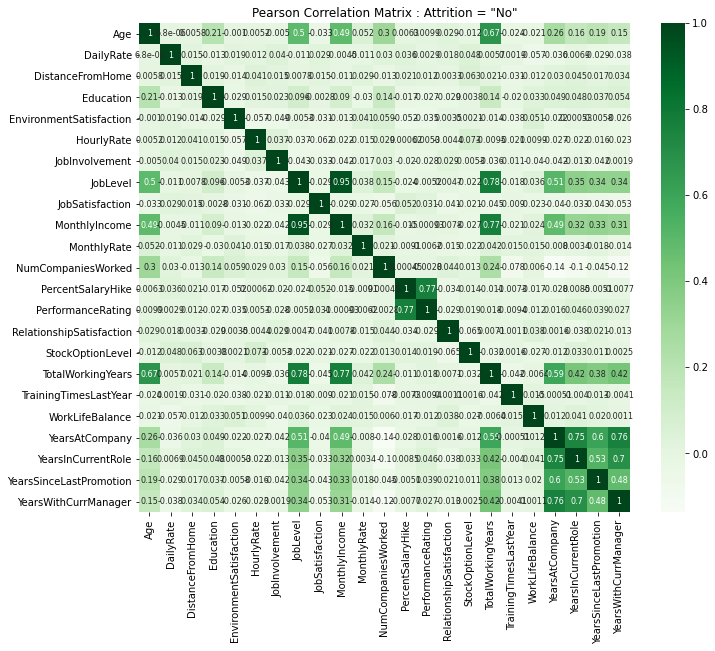

In [12]:
# Plot Pearson correlation matrix  for Attrition = "No"
fig_1 = plt.figure(figsize=(11, 9)) 
correlations = df_Attrition_No.corr() 

sns.heatmap(correlations, annot=True, cmap='Greens', annot_kws={'size': 8}) 
plt.title('Pearson Correlation Matrix : Attrition = "No"') 
plt.show()

In [13]:
# Get a series of unique values in column 'Department' of the dataframe
uniqueValues = df_start['Department'].unique()

print('Unique elements in column "Department" ')
print(uniqueValues)

Unique elements in column "Department" 
['Sales' 'Research & Development' 'Human Resources']


In [14]:
# Get a series of unique values in column 'EducationField' of the dataframe
uniqueValues = df_start['EducationField'].unique()

print('Unique elements in column "EducationField" ')
print(uniqueValues)

Unique elements in column "EducationField" 
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


In [15]:
fig = px.density_heatmap(df_start, x="EducationField", y="MonthlyIncome", template="seaborn")
print("Heatmap Education Field & Monthly income")
fig.show()

Heatmap Education Field & Monthly income


In [16]:
fig = px.histogram(df_start, x="EducationField", y="MonthlyIncome", color="Attrition",
            title="Attrition per department & monthly income",
            width=600, height=400,
            labels={"Attrition": "Yes/No",  "EducationField": "Education Field", "MonthlyIncome": "Income"},
            category_orders={"Department": ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'], "Attrition": ["Yes", "No"]},
            color_discrete_map={"Yes": "RebeccaPurple", "No": "MediumPurple"},
            template="simple_white"
            )

fig.update_yaxes( # the y-axis is in dollars
    tickprefix="$", showgrid=True
)

fig.update_layout( # customize font and legend orientation & position
    legend=dict(
        title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"
    )
)


fig.add_annotation( # add a text callout with arrow
    text="least", x="Human Resources", y=400, arrowhead=1, showarrow=True
)

fig.show()

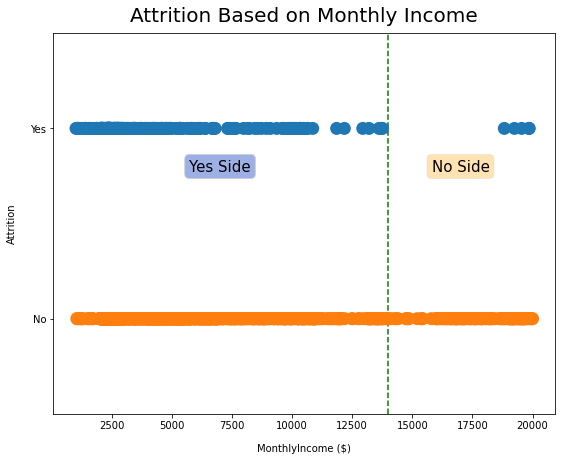

In [17]:
#Visual Derivation of Logistic Regression Equation
#Let's continue with the example. We'll utilize a single feature, monthly income, and two class labels of Attrition "Yes" and "No".

plt.figure(figsize=(9, 7))

ax = sns.stripplot(data=df_start, x="MonthlyIncome", y="Attrition", jitter=False, size=13)

plt.xlabel("MonthlyIncome ($)", labelpad=13)
plt.ylabel("Attrition", labelpad=13)
plt.title("Attrition Based on Monthly Income", y=1.015, fontsize=20)

plt.axvline(x=14000, linestyle="--", color='green')

bbox_props_No = dict(boxstyle="round", fc="#859ce0", ec="0.8", alpha=0.8)
ax.text(7000, 0.2, "Yes Side", ha="center", va="center", size=15, bbox=bbox_props_No)
bbox_props_Yes = dict(boxstyle="round", fc="orange", ec="0.8", alpha=0.3)
ax.text(17000, 0.2, "No Side", ha="center", va="center", size=15, bbox=bbox_props_Yes)

ax = plt.gca()


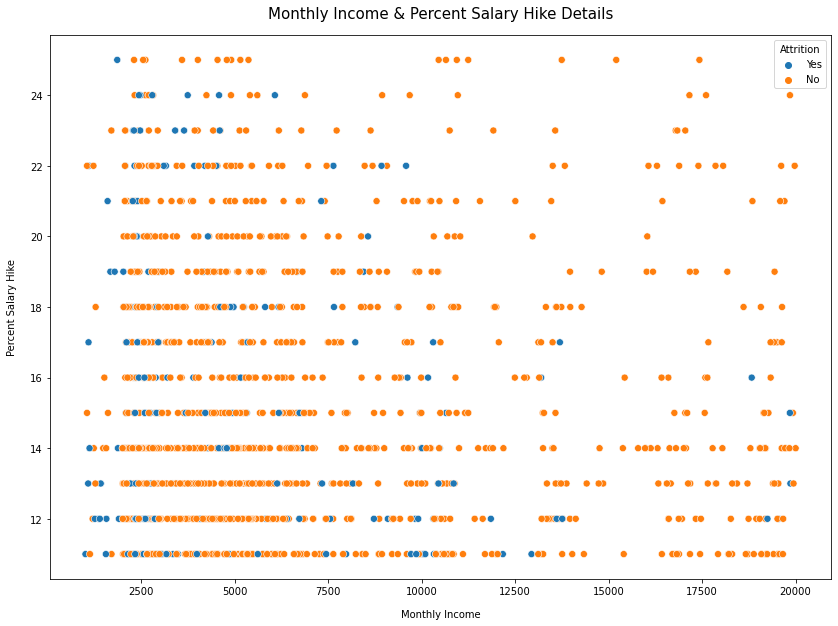

In [18]:
#Visualize two features and two class labels.

plt.figure(figsize=(14, 10))
sns.scatterplot(x='MonthlyIncome', y='PercentSalaryHike', hue='Attrition', data=df_start, s=50)

plt.title("Monthly Income & Percent Salary Hike Details", y=1.02, fontsize=15)
plt.xlabel("Monthly Income", labelpad=13)
plt.ylabel("Percent Salary Hike", labelpad=13)

ax = plt.gca()

In [19]:
df_Attrition_Yes_Income_high = df_Attrition_Yes[df_start['MonthlyIncome']>17000]
df_Attrition_Yes_Income_high

<ipython-input-19-e2cb599bbf25>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Age Attrition BusinessTravel  DailyRate              Department  \
45    41       Yes  Travel_Rarely       1360  Research & Development   
568   55       Yes  Travel_Rarely        725  Research & Development   
595   58       Yes  Travel_Rarely        286  Research & Development   
749   52       Yes  Travel_Rarely        266                   Sales   
913   45       Yes  Travel_Rarely       1449                   Sales   

     DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  \
45                 12          3  Technical Degree                        2   
568                 2          3           Medical                        4   
595                 2          4     Life Sciences                        4   
749                 2          1         Marketing                        1   
913                 2          3         Marketing                        1   

     Gender  ...  PerformanceRating  RelationshipSatisfaction  \
45   Female  ...                  3                         4   
568    Male  ...                  3                         4   
595    Male  ...                  3                         4   
749  Female  ...                  3                         4   
913  Female  ...                  3                         1   

     StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
45                  0                23                      0   
568                 1                24                      2   
595                 0                40                      2   
749                 1                33                      3   
913                 0                26                      2   

    WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
45                3              22                  15   
568               3               5                   2   
595               3              31                  15   
749               3              32                  14   
913               3              24                  10   

     YearsSinceLastPromotion YearsWithCurrManager  
45                        15                    8  
568                        1                    4  
595                       13                    8  
749                        6                    9  
913                        1                   11  

[5 rows x 32 columns]

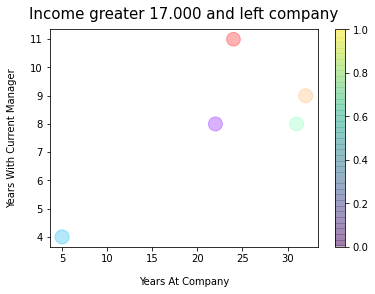

In [20]:
data = df_Attrition_Yes_Income_high
x = data['YearsAtCompany']
y = data['YearsWithCurrManager']
colors = cm.rainbow(np.linspace(0, 1, len(y)))
sizes = 0.0100 * data['MonthlyIncome']


plt.title("Income greater 17.000 and left company", y=1.02, fontsize=15)
plt.xlabel("Years At Company", labelpad=13)
plt.ylabel("Years With Current Manager", labelpad=13)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar(); 


In [21]:
df_Attrition_Yes_Income_low = df_Attrition_Yes[df_start['MonthlyIncome']<17000]
df_Attrition_Yes_Income_low

<ipython-input-21-af8f4b89a927>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
2      37       Yes      Travel_Rarely       1373  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
24     34       Yes      Travel_Rarely        699  Research & Development   
...   ...       ...                ...        ...                     ...   
1438   23       Yes  Travel_Frequently        638                   Sales   
1442   29       Yes      Travel_Rarely       1092  Research & Development   
1444   56       Yes      Travel_Rarely        310  Research & Development   
1452   50       Yes  Travel_Frequently        878                   Sales   
1461   50       Yes      Travel_Rarely        410                   Sales   

      DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  \
0                    1          2     Life Sciences                        2   
2                    2          2             Other                        4   
14                  24          3     Life Sciences                        3   
21                   9          4     Life Sciences                        3   
24                   6          1           Medical                        2   
...                ...        ...               ...                      ...   
1438                 9          3         Marketing                        4   
1442                 1          4           Medical                        1   
1444                 7          2  Technical Degree                        4   
1452                 1          4     Life Sciences                        2   
1461                28          3         Marketing                        4   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female  ...                  3                         1   
2       Male  ...                  3                         2   
14      Male  ...                  3                         2   
21      Male  ...                  4                         2   
24      Male  ...                  3                         3   
...      ...  ...                ...                       ...   
1438    Male  ...                  3                         1   
1442    Male  ...                  3                         2   
1444    Male  ...                  3                         4   
1452    Male  ...                  3                         4   
1461    Male  ...                  3                         2   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 8                      0   
2                    0                 7                      3   
14                   0                 6                      4   
21                   0                10                      4   
24                   0                 8                      2   
...                ...               ...                    ...   
1438                 1                 1                      3   
1442                 3                 4                      3   
1444                 1                14                      4   
1452                 2                12                      3   
1461                 1                20                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  1               6                   4   
2                  3               0                   0   
14                 3               4                   2   
21                 3               5                   3   
24                 3               4                   2   
...              ...             ...                 ...   
1438               2               1                   0   
1442               4               2      

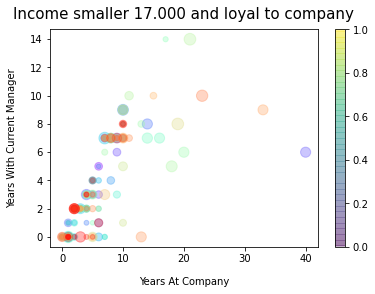

In [22]:
data = df_Attrition_Yes_Income_low
x = data['YearsAtCompany']
y = data['YearsWithCurrManager']
colors = cm.rainbow(np.linspace(0, 1, len(y)))
sizes = 0.0100 * data['MonthlyIncome']

plt.title("Income smaller 17.000 and loyal to company", y=1.02, fontsize=15)
plt.xlabel("Years At Company", labelpad=13)
plt.ylabel("Years With Current Manager", labelpad=13)


plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar(); 

In [23]:
# import raw dataset
df_numerical = pd.read_csv("./data/raw.csv")

In [24]:
df_numerical_selected = pd.DataFrame(df_numerical,
                  columns=["Department","RelationshipSatisfaction","EducationField","EnvironmentSatisfaction","YearsAtCompany"])


In [25]:
fig = px.parallel_categories(df_numerical_selected, color="EnvironmentSatisfaction", color_continuous_scale='Inferno')
fig.show()

In [26]:
# Second Dataset (Pre-Clusterd)

In [27]:
df2 = pd.read_csv("./data/first.csv")

In [28]:
df2.filter(regex='Year', axis=1)

TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                     8                      0               6   
1                    10                      3              10   
2                     7                      3               0   
3                     8                      3               8   
4                     6                      3               2   
...                 ...                    ...             ...   
1465                 17                      3               5   
1466                  9                      5               7   
1467                  6                      0               6   
1468                 17                      3               9   
1469                  6                      3               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                      4                        0                     5  
1                      7                        1                     7  
2                      0                        0                     0  
3                      7                        3                     0  
4                      2                        2                     2  
...                  ...                      ...                   ...  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2  

[1470 rows x 6 columns]

In [29]:
# Review unique values - TotalWorkingYears

Years = df2["TotalWorkingYears"].unique()
np.sort(Years)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 40])

In [30]:
# Clustering in 8 step interval

# Cluster 0 - 7 Years
df2["TotalWorkingYears"].replace({0: "0-7 years", 1: "0-7 years", 2: "0-7 years", 3: "0-7 years",4: "0-7 years",5: "0-7 years",6: "0-7 years",7: "0-7 years"},
                                 inplace=True)

# Cluster 8 - 15 Years
df2["TotalWorkingYears"].replace({8: "8-15 years", 9: "8-15 years", 10: "8-15 years", 11: "8-15 years", 12: "8-15 years", 13: "8-15 years", 14: "8-15 years", 15: "8-15 years"},
                                 inplace=True)

# Cluster 16 - 23 Years
df2["TotalWorkingYears"].replace({16: "16-23 years", 17: "16-23 years", 18: "16-23 years", 19: "16-23 years", 20: "16-23 years", 21: "16-23 years", 22: "16-23 years", 23: "16-23 years"},
                                 inplace=True)

# Cluster 24 - 31 Years
df2["TotalWorkingYears"].replace({24: "24-31 years", 25: "24-31 years", 26: "24-31 years", 27: "24-31 years", 28: "24-31 years", 29: "24-31 years", 30: "24-31 years", 31: "24-31 years"},
                                 inplace=True)

# Cluster 32 - 40 Years
df2["TotalWorkingYears"].replace({32: "32-40 years", 33: "32-40 years", 34: "32-40 years", 35: "32-40 years", 36: "32-40 years", 37: "32-40 years", 38: "32-40 years", 39: "32-40 years", 40: "32-40 years"},
                                 inplace=True)



In [31]:
Years2 = df2["TotalWorkingYears"].unique()
Years2

array(['8-15 years', '0-7 years', '16-23 years', '24-31 years',
       '32-40 years'], dtype=object)

In [32]:
# Review unique values - TrainingTimesLastYear

Years = df2["TrainingTimesLastYear"].unique()
np.sort(Years)

array([0, 1, 2, 3, 4, 5, 6])

In [33]:
# Clustering in 2 step interval

# Cluster No Training
df2["TrainingTimesLastYear"].replace({0: "No training"},
                                 inplace=True)

# Cluster 1 - 2 Trainings
df2["TrainingTimesLastYear"].replace({1: "1-2 trainings", 2: "1-2 trainings"},
                                 inplace=True)

# Cluster 3 - 4 Trainings
df2["TrainingTimesLastYear"].replace({3: "3-4 trainings", 4: "3-4 trainings"},
                                 inplace=True)

# Cluster 5 - 6 Trainings
df2["TrainingTimesLastYear"].replace({5: "5-6 trainings", 6: "5-6 trainings"},
                                     inplace=True)

In [34]:
Years2 = df2["TrainingTimesLastYear"].unique()
Years2

array(['No training', '3-4 trainings', '1-2 trainings', '5-6 trainings'],
      dtype=object)

In [35]:
# Review unique values - YearsAtCompany

Years = df2["YearsAtCompany"].unique()
np.sort(Years)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34,
       36, 37, 40])

In [36]:
# Clustering in 8 step interval

# Cluster 0 - 7 Years
df2["YearsAtCompany"].replace({0: "0-7 years", 1: "0-7 years", 2: "0-7 years", 3: "0-7 years",4: "0-7 years",5: "0-7 years",6: "0-7 years",7: "0-7 years"},
                                 inplace=True)

# Cluster 8 - 15 Years
df2["YearsAtCompany"].replace({8: "8-15 years", 9: "8-15 years", 10: "8-15 years", 11: "8-15 years", 12: "8-15 years", 13: "8-15 years", 14: "8-15 years", 15: "8-15 years"},
                                 inplace=True)

# Cluster 16 - 23 Years
df2["YearsAtCompany"].replace({16: "16-23 years", 17: "16-23 years", 18: "16-23 years", 19: "16-23 years", 20: "16-23 years", 21: "16-23 years", 22: "16-23 years", 23: "16-23 years"},
                                 inplace=True)

# Cluster 24 - 31 Years
df2["YearsAtCompany"].replace({24: "24-31 years", 25: "24-31 years", 26: "24-31 years", 27: "24-31 years", 28: "24-31 years", 29: "24-31 years", 30: "24-31 years", 31: "24-31 years"},
                                 inplace=True)

# Cluster 32 - 40 Years
df2["YearsAtCompany"].replace({32: "32-40 years", 33: "32-40 years", 34: "32-40 years", 35: "32-40 years", 36: "32-40 years", 37: "32-40 years", 38: "32-40 years", 39: "32-40 years", 40: "32-40 years"},
                                 inplace=True)

In [37]:
Years2 = df2["YearsAtCompany"].unique()
Years2

array(['0-7 years', '8-15 years', '24-31 years', '16-23 years',
       '32-40 years'], dtype=object)

In [38]:
# Review unique values - YearsInCurrentRole

Years = df2["YearsInCurrentRole"].unique()
np.sort(Years)

# 5 value frame

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [39]:
# Clustering in 5 step interval

# Cluster 0 - 4 Years
df2["YearsInCurrentRole"].replace({0: "0-4 years", 1: "0-4 years", 2: "0-4 years", 3: "0-4 years",4: "0-4 years"},
                                 inplace=True)

# Cluster 5 - 9 Years
df2["YearsInCurrentRole"].replace({5: "5-9 years", 6: "5-9 years", 7: "5-9 years", 8: "5-9 years", 9: "5-9 years"},
                                 inplace=True)

# Cluster 10 - 14 Years
df2["YearsInCurrentRole"].replace({10: "10-14 years", 11: "10-14 years", 12: "10-14 years", 13: "10-14 years", 14: "10-14 years"},
                                 inplace=True)

# Cluster 15 - 19 Years
df2["YearsInCurrentRole"].replace({15: "15-19 years", 16: "15-19 years", 17: "15-19 years", 18: "15-19 years", 19: "15-19 years"},
                                 inplace=True)


In [40]:
Years2 = df2["YearsInCurrentRole"].unique()
Years2

array(['0-4 years', '5-9 years', '10-14 years', '15-19 years'],
      dtype=object)

In [41]:
# Review unique values - YearsSinceLastPromotion

Years = df2["YearsSinceLastPromotion"].unique()
np.sort(Years)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [42]:
# Clustering in 5 step interval

# Cluster No / Recent Promotion
df2["YearsSinceLastPromotion"].replace({0: "No Promotion"},
                                 inplace=True)

# Cluster 1 - 5 Years
df2["YearsSinceLastPromotion"].replace({0: "1-5 years", 1: "1-5 years", 2: "1-5 years", 3: "1-5 years",4: "1-5 years"},
                                 inplace=True)

# Cluster 6 - 10 Years
df2["YearsSinceLastPromotion"].replace({6: "6-10 years", 7: "6-10 years", 8: "6-10 years", 9: "6-10 years", 10: "6-10 years"},
                                 inplace=True)

# Cluster 10 - 15 Years
df2["YearsSinceLastPromotion"].replace({10: "11-15 years", 11: "10-14 years", 12: "11-15 years", 13: "11-15 years", 14: "11-15 years", 15: "11-15 years"},
                                 inplace=True)



In [43]:
Years2 = df2["YearsSinceLastPromotion"].unique()
Years2

array(['No Promotion', '1-5 years', '6-10 years', 5, '11-15 years',
       '10-14 years'], dtype=object)

In [44]:
# Review unique values - YearsWithCurrManager

Years = df2["YearsWithCurrManager"].unique()
np.sort(Years)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [45]:
# Clustering in 5 step interval

# Cluster 0 - 4 Years
df2["YearsWithCurrManager"].replace({0: "0-4 years", 1: "0-4 years", 2: "0-4 years", 3: "0-4 years",4: "0-4 years"},
                                 inplace=True)

# Cluster 5 - 9 Years
df2["YearsWithCurrManager"].replace({5: "5-9 years", 6: "5-9 years", 7: "5-9 years", 8: "5-9 years", 9: "5-9 years"},
                                 inplace=True)

# Cluster 10 - 14 Years
df2["YearsWithCurrManager"].replace({10: "10-14 years", 11: "10-14 years", 12: "10-14 years", 13: "10-14 years", 14: "10-14 years"},
                                 inplace=True)

# Cluster 15 - 19 Years
df2["YearsWithCurrManager"].replace({15: "15-19 years", 16: "15-19 years", 17: "15-19 years", 18: "15-19 years", 19: "15-19 years"},
                                 inplace=True)

In [46]:
Years2 = df2["YearsWithCurrManager"].unique()
Years2

array(['5-9 years', '0-4 years', '10-14 years', '15-19 years'],
      dtype=object)

In [47]:
df2.filter(regex='Year', axis=1)

TotalWorkingYears TrainingTimesLastYear YearsAtCompany  \
0           8-15 years           No training      0-7 years   
1           8-15 years         3-4 trainings     8-15 years   
2            0-7 years         3-4 trainings      0-7 years   
3           8-15 years         3-4 trainings     8-15 years   
4            0-7 years         3-4 trainings      0-7 years   
...                ...                   ...            ...   
1465       16-23 years         3-4 trainings      0-7 years   
1466        8-15 years         5-6 trainings      0-7 years   
1467         0-7 years           No training      0-7 years   
1468       16-23 years         3-4 trainings     8-15 years   
1469         0-7 years         3-4 trainings      0-7 years   

     YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager  
0             0-4 years            No Promotion            5-9 years  
1             5-9 years               1-5 years            5-9 years  
2             0-4 years            No Promotion            0-4 years  
3             5-9 years               1-5 years            0-4 years  
4             0-4 years               1-5 years            0-4 years  
...                 ...                     ...                  ...  
1465          0-4 years            No Promotion            0-4 years  
1466          5-9 years               1-5 years            5-9 years  
1467          0-4 years            No Promotion            0-4 years  
1468          5-9 years            No Promotion            5-9 years  
1469          0-4 years               1-5 years            0-4 years  

[1470 rows x 6 columns]

In [48]:
df2.to_csv("./data/second.csv",encoding='utf-8')

In [49]:
df_Clustered_2 = pd.DataFrame(df2,
                  columns=["Department","RelationshipSatisfaction","EducationField","EnvironmentSatisfaction","YearsAtCompany"])


In [50]:
fig = px.parallel_categories(df_Clustered_2, color="EnvironmentSatisfaction", color_continuous_scale='Inferno')
fig.show()